<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/Term_2_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### refer : http://www.cs.cmu.edu/afs/cs/project/PIE/MultiPie/Multi-Pie/Home.html

##Connect Drive

In [1]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [2]:
# !unzip -o ./mpie_30_shuffle.zip -d ./mpie_30_shuffle

In [3]:
!ls

mpie_30_shuffle


##EDA

In [4]:
path = path_root + 'mpie_30_shuffle/'
import pandas as pd
import numpy as np

# train
train_feature = pd.read_csv(path + 'Traindata.csv', dtype=np.float32, header=None) # image features of train data
train_label_csv = pd.read_csv(path + 'Trainlabel.csv', dtype=np.float32, header=None) # labels of train data


In [5]:
train_feature.shape, train_label_csv.shape

((18777, 1024), (18777, 6))

###check train label

In [6]:
# train_label_csv.info()
train_label_csv

,0,1,2,3,4,5
0,12.0,2.0,3.0,0.0,0.0,3.0
1,1.0,1.0,4.0,1.0,2.0,1.0
2,12.0,2.0,0.0,0.0,0.0,3.0
3,3.0,1.0,4.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
18772,25.0,0.0,2.0,0.0,0.0,2.0
18773,12.0,0.0,0.0,0.0,0.0,3.0
18774,20.0,0.0,0.0,0.0,1.0,3.0
18775,11.0,0.0,3.0,0.0,3.0,3.0


In [7]:
for column_name in list(train_label_csv.columns):
  print(f'{column_name} : {train_label_csv[column_name].nunique()}')

0 : 30
1 : 6
2 : 5
3 : 2
4 : 5
5 : 4


In [8]:
num_train = train_label_csv.shape[0] # number of train data
# num_train
# train_label = train_label_csv[0][0:num_train] # get label you want
train_label = train_label_csv.loc[:,0]  # get label you want
print(f'train_label.shape : {train_label.shape}')

import tensorflow.keras as kas
train_label_onehot = np.array(kas.utils.to_categorical(train_label)) # convert '1-dimensional int type label' to 'one-hot vector'
train_label_onehot.shape, train_label_onehot[2], train_label_onehot[2].ndim, train_label_onehot[2].size

train_label.shape : (18777,)


((18777, 30),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 1,
 30)

###check train feature

In [9]:
train_feature.shape, train_feature.iloc[3].shape, train_label.iloc[3]

((18777, 1024), (1024,), 3.0)

In [10]:
import matplotlib.pyplot as plt

In [11]:
type(train_feature.iloc[3]), type(train_feature.iloc[3].values), type(train_feature.iloc[3].to_numpy())

(pandas.core.series.Series, numpy.ndarray, numpy.ndarray)

(32, 32)


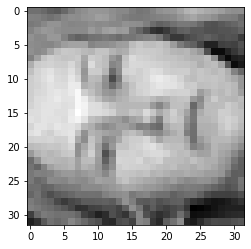

In [12]:
train_feature_reshape = np.reshape(train_feature.iloc[10].values, (32,-1))
print(train_feature_reshape.shape)
# plt.imshow(train_feature_reshape, cmap='gray')
plt.imshow(np.reshape(train_feature.iloc[10].values, (32,-1)), cmap='gray')

plt.show()

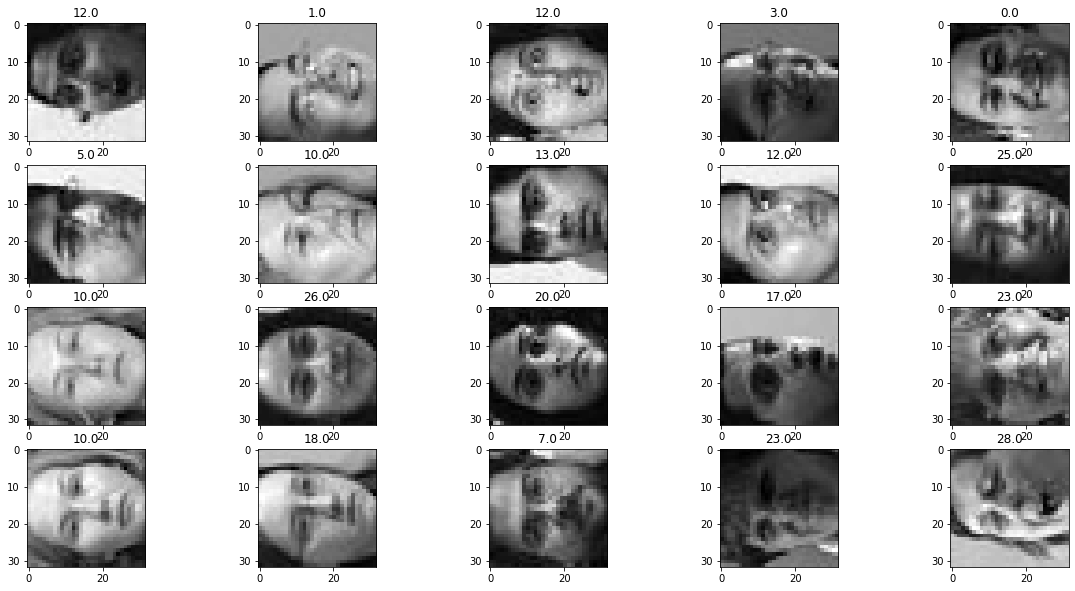

In [13]:
plt.figure(figsize=(20,10))

train_feature_rows = train_feature.shape[0]
train_feature_cols = train_feature.shape[1]
train_feature_rows = 4
train_feature_cols = 5
# for idx in range(train_feature.shape[0]):
for idx in range(20):
  plt.subplot(train_feature_rows, train_feature_cols, idx+1)
  plt.imshow(np.reshape(train_feature.iloc[idx].values, (32,-1)), cmap='gray')
  plt.title(train_label.iloc[idx])

# plt.tight_layout()

##check test dataset

In [14]:
# test
validation_feature = pd.read_csv(path + 'Testdata.csv', dtype=np.float32, header=None) # image feature of test data
validation_label_csv = pd.read_csv(path + 'Testlabel.csv', dtype=np.float32, header=None) # labels of test data
validation_label = validation_label_csv[0] # get label you want
validation_label_onehot = np.array(kas.utils.to_categorical(validation_label)) # convert '1-dimensional int type label' to 'one-hot vector'
validation_feature.shape, validation_label_csv.shape, validation_label.shape, validation_label_onehot.shape

((5086, 1024), (5086, 6), (5086,), (5086, 30))

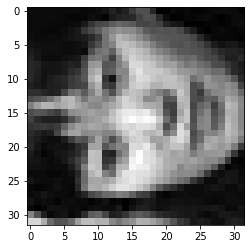

In [15]:
validation_feature_reshape = np.reshape(validation_feature.iloc[10].values, (32,-1))
plt.imshow(validation_feature_reshape, cmap='gray')
plt.show()

##Transform flatten numpy to Tensors

In [16]:
train_feature.shape, train_label.shape, np.unique(train_label.values, return_counts=True)

((18777, 1024),
 (18777,),
 (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
         26., 27., 28., 29.], dtype=float32),
  array([756, 762, 673, 508, 732, 765, 384, 775, 721, 545, 703, 669, 609,
         743, 621, 510, 693, 679, 705, 401, 642, 592, 524, 571, 473, 355,
         637, 779, 492, 758])))

In [17]:
train_feature_flatten = train_feature.values.flatten()
train_feature_reshape = np.reshape(train_feature_flatten, (train_feature.shape[0], 32,-1))
train_feature_reshape.shape, type(train_feature_reshape)

((18777, 32, 32), numpy.ndarray)

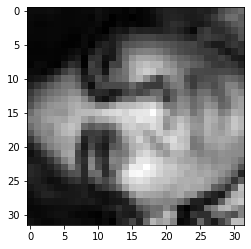

In [18]:
plt.imshow(train_feature_reshape[33], cmap='gray')
plt.show()

In [19]:
validation_feature_flatten = validation_feature.values.flatten()
validation_feature_reshape = np.reshape(validation_feature_flatten, (validation_feature.shape[0], 32,-1))
validation_feature_reshape.shape, type(validation_feature_reshape)

((5086, 32, 32), numpy.ndarray)

In [20]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((train_feature_reshape, train_label))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_feature_reshape, validation_label))

###Shuffle and batch the datasets

In [21]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
# validation_dataset = validation_dataset.batch(BATCH_SIZE, drop_remainder=True).repeat()
# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
# validation_dataset = validation_dataset.batch(BATCH_SIZE, drop_remainder=True)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)


In [22]:
# for element in validation_dataset:
#   print(element)

### Build and train a model

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(30)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [24]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
294/294 [==============================] - 4s 10ms/step - loss: 2.4143 - sparse_categorical_accuracy: 0.3411
Epoch 2/10
294/294 [==============================] - 2s 8ms/step - loss: 1.3052 - sparse_categorical_accuracy: 0.6837
Epoch 3/10
294/294 [==============================] - 1s 5ms/step - loss: 0.7960 - sparse_categorical_accuracy: 0.8210
Epoch 4/10
294/294 [==============================] - 1s 5ms/step - loss: 0.5328 - sparse_categorical_accuracy: 0.8850
Epoch 5/10
294/294 [==============================] - 1s 4ms/step - loss: 0.3888 - sparse_categorical_accuracy: 0.9156
Epoch 6/10
294/294 [==============================] - 1s 4ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.9363
Epoch 7/10
294/294 [==============================] - 1s 4ms/step - loss: 0.2344 - sparse_categorical_accuracy: 0.9503
Epoch 8/10
294/294 [==============================] - 1s 5ms/step - loss: 0.1892 - sparse_categorical_accuracy: 0.9592
Epoch 9/10
294/294 [===========================

In [25]:
model.evaluate(validation_dataset)

80/80 [==============================] - 0s 2ms/step - loss: 0.2971 - sparse_categorical_accuracy: 0.9119


[0.29705873131752014, 0.9119150638580322]